# Practice MLP
## Advanced Models for Data Analysis 2

______

Developed by:
* Andres Martinez
* Nicolas Gil
* Jorge Medina

______

### University of Los Andes

Date: 21/10/2019

# **The Reuters dataset**

It is a set of short newswires and their topics, published by Reuters in 1986. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set. 

The Reuters dataset comes packaged as part of Keras. The following code will load the dataset. 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


The argument ``num_words=10000`` means you'll only keep the top 10000 most frequently occurring words in the training data. Rare words will be discarted. 

The variables ``train_data`` and ``test_data`` are lists of newswires; each new is a list of word indices (encoding a sequence of words). 
You have 8982 training examples and 2246 test examples.





In [2]:
len(train_data)

8982

In [3]:
 len(test_data)

2246

In [4]:
#Each example is a list of integers (word indices):
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Because you're restricting yourself to the top 10000 most frequent words, no word index will exceed 10000: 

In [5]:
max([max(i) for i in train_data])


9999

Here's how you can decode one of these news back to English words: 

In [6]:
word_index = reuters.get_word_index() #word_index is a dictionary mapping words to an integer index
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()]) #reverses it, mapping integer indices to words
decoded_newswire= ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[10]]) #the indices are offset by 3 because 0, 1, and 2 are reserved indices for "padding," "start of sequence," and "unknowns."
print(decoded_newswire)

? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


The label associated with an example is an integer between 0 and 45 - a topic index:

In [7]:
train_labels[150]

7

# **Preparing the data**

You have to turn your lists into tensors. There are two ways to do that: 


1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape `(samples, word_indices)`, and then use as the first layer in your network a layer capable of handling such integer tensors.
2.   One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for maximum clarity.



In [0]:
#Encoding the integer sequences into a binary matrix 
import numpy as np

def vectorize_sequences(sequences, dimension=10000):   #Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          #Sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)   #Vectorized training data
x_test = vectorize_sequences(test_data)     #Vectorized test data

Here’s what the samples look like now:


In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index. Here’s an example:

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels) #Vectorized training labels
one_hot_test_labels = to_one_hot(test_labels)   #Vectorized test labels

There is a *built-in way* to do this in Keras:

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# **Validating your approach**

Let’s set apart 1000 samples in the training data to use as a validation set.

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# **Building your network**





## **MLP With Different Loss Functions**

Will be create 4 different neural network for analysis.
Each analysis will have:

* Parameters specification
* Training and Validation loss
* Summary

____

### Sigmoid Activation and MSE Loss with 2 dense layers

First Neural Network for Analysis with two (2) dense layers:

* First Layer
  * 64 neurons per layer
  * Activation Function : `sigmoid`

* Second Layer
  * 46 neurons per layer
  * Activation Function : `sigmoid`
  
- Optimizer : `sgd`
- Loss Function : `mse`

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='sigmoid', input_shape=(10000,)))
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 1s 162us/step - loss: 0.2578 - acc: 0.0484 - val_loss: 0.2563 - val_acc: 0.0460
Epoch 2/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.2547 - acc: 0.0484 - val_loss: 0.2531 - val_acc: 0.0460
Epoch 3/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.2516 - acc: 0.0484 - val_loss: 0.2501 - val_acc: 0.0460
Epoch 4/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.2486 - acc: 0.0484 - val_loss: 0.2470 - val_acc: 0.0460
Epoch 5/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.2455 - acc: 0.0484 - val_loss: 0.2440 - val_acc: 0.0460
Epoch 6/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.2425 - acc: 0.0484 - val_loss: 0.2410 - val_acc: 0.0460
Epoch 7/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.2395 - acc: 0.0484 - val_loss: 0.2381 - val_acc: 0.046

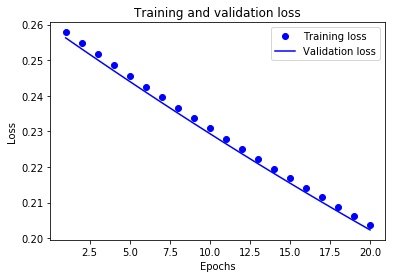

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 643,054
Trainable params: 643,054
Non-trainable params: 0
_________________________________________________________________


____

### Softmax Activation and MSE Loss with 3 dense layers

First Neural Network for Analysis with three (3) dense layers:

* First Layer
  * 512 neurons per layer
  * Activation Function : `relu`

* Second Layer
  * 1024 neurons per layer
  * Activation Function : `relu`
  
* Third Layer
  * 46 neurons per layer
  * Activation Function : `softmax`
  
- Optimizer : `sgd`
- Loss Function : `mse`

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.0213 - acc: 0.0405 - val_loss: 0.0212 - val_acc: 0.0350
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.0213 - acc: 0.0408 - val_loss: 0.0212 - val_acc: 0.0350
Epoch 3/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.0213 - acc: 0.0410 - val_loss: 0.0212 - val_acc: 0.0350
Epoch 4/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.0213 - acc: 0.0415 - val_loss: 0.0212 - val_acc: 0.0350
Epoch 5/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.0212 - acc: 0.0417 - val_loss: 0.0212 - val_acc: 0.0360
Epoch 6/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.0212 - acc: 0.0426 - val_loss: 0.0212 - val_acc: 0.0360
Epoch 7/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.0212 - acc: 0.0431 - val_loss: 0.0212 - val_acc: 0.0360
Epoch 

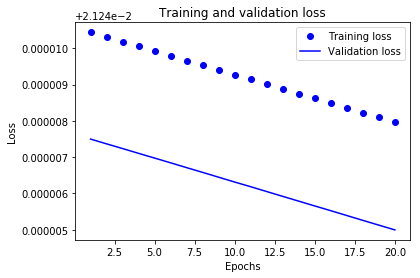

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 46)                47150     
Total params: 5,692,974
Trainable params: 5,692,974
Non-trainable params: 0
_________________________________________________________________


____

### Sigmoid Activation and Binary Cross Entropy Loss with 2 dense layers

First Neural Network for Analysis with two (2) dense layers:

* First Layer
  * 64 neurons per layer
  * Activation Function : `sigmoid`

* Second Layer
  * 46 neurons per layer
  * Activation Function : `sigmoid`
  
- Optimizer : `adam`
- Loss Function : `categorical_crossentropy`

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='sigmoid', input_shape=(10000,)))
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 92us/step - loss: 3.7129 - acc: 0.0714 - val_loss: 3.4446 - val_acc: 0.2670
Epoch 2/20
7982/7982 [==============================] - 0s 61us/step - loss: 3.2861 - acc: 0.4544 - val_loss: 3.1283 - val_acc: 0.5750
Epoch 3/20
7982/7982 [==============================] - 1s 64us/step - loss: 2.9783 - acc: 0.5764 - val_loss: 2.8333 - val_acc: 0.5580
Epoch 4/20
7982/7982 [==============================] - 1s 64us/step - loss: 2.6824 - acc: 0.5417 - val_loss: 2.5568 - val_acc: 0.5130
Epoch 5/20
7982/7982 [==============================] - 0s 62us/step - loss: 2.4085 - acc: 0.5003 - val_loss: 2.3096 - val_acc: 0.4740
Epoch 6/20
7982/7982 [==============================] - 0s 62us/step - loss: 2.1705 - acc: 0.4554 - val_loss: 2.1096 - val_acc: 0.4200
Epoch 7/20
7982/7982 [==========================

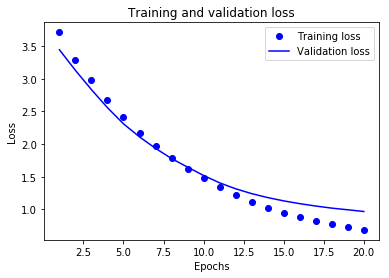

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 46)                2990      
Total params: 643,054
Trainable params: 643,054
Non-trainable params: 0
_________________________________________________________________


____

### Softmax Activation and MSE Loss with 3 dense layers

First Neural Network for Analysis with three (3) dense layers:

* First Layer
  * 512 neurons per layer
  * Activation Function : `relu`

* Second Layer
  * 1024 neurons per layer
  * Activation Function : `relu`
  
* Third Layer
  * 46 neurons per layer
  * Activation Function : `softmax`
  
- Optimizer : `adam`
- Loss Function : `categorical_crossentropy`

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 144us/step - loss: 2.2838 - acc: 0.5435 - val_loss: 1.4441 - val_acc: 0.6740
Epoch 2/20
7982/7982 [==============================] - 1s 92us/step - loss: 1.1359 - acc: 0.7442 - val_loss: 1.0993 - val_acc: 0.7660
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.6959 - acc: 0.8349 - val_loss: 0.9569 - val_acc: 0.8050
Epoch 4/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.3865 - acc: 0.9118 - val_loss: 0.9288 - val_acc: 0.8200
Epoch 5/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.2387 - acc: 0.9422 - val_loss: 0.9452 - val_acc: 0.8180
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.1637 - acc: 0.9562 - val_loss: 0.9496 - val_acc: 0.8230
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.1382 - acc: 0.9582 - val_loss: 0.9694 - val_acc: 0.8150
Epoch 

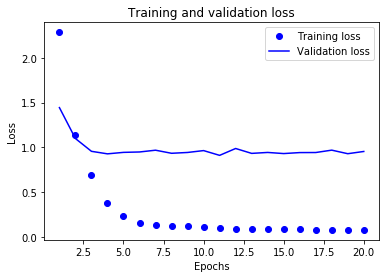

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_10 (Dense)             (None, 46)                47150     
Total params: 5,692,974
Trainable params: 5,692,974
Non-trainable params: 0
_________________________________________________________________


# Analysis

Kindly note that were built 4 models that have the following characteristics:

| Model | Model 1 | Model 2 | Model 3 | Model 4 |
|-------|---------|---------|---------|---------|
|   # of Layers | 2 | 3 | 2 | 3 |
|   Optimizer | SGD | SGD | adam | adam |
|   Loss Function | MSE | MSE | Categorical Crossentropy | Categorical Crossentropy |

The architecture with 2 or 3 layers have the following parameters:

### 2 Dense Layers

|   Layer No. | 1 | 2 | 
|-------|---------|---------|
|   Neurons per Layer | 64 | 46 | 
|   Activation Function | sigmoid | sigmoid | 

### 3 Dense Layers

|   Layer No. | 1 | 2 | 3 | 
|-------|---------|---------|---------|
|   Neurons per Layer | 512 | 1024 | 46 | 
|   Activation Function | relu | relu | softmax | 

In order to provides an answer, we must talk about the metric to evaluate the models; can be compare those models with the same metric.

That means that we might evaluate the model 1 with 2, and model 3 with 4.

The model 1 and 2 differs on the 3 aspects: 
- Number of layers
- Neurons per layer 
- Optimizer
- Activation Functions

Becuase that, we find that the model 2 have a better performance what means that increasing the number of dense layers improves the performance (or minimize the loss function) keeping the same optimizer and activation function.

On the other hand, talking about the models 3 and 4, we find that both differs on the same aspect as the models 1 and 2. 

As we found on the previous analysis, increasing the number of dense layers for the neural network architecture, implied to improve the performance.

After a brief research [click here](https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/), the function `Categorical_Crossentropy` is often use to evaluate multiclass problems, as this problem is. In other words, for the context and performance, we recommend to use the model 4.